### Assignment 4

* Name: Taylor Gabatino

### About Assignment 4

* In this assignment, you will compare the performance of machine learning models (three that were covered in class and a new one) on a classification task to classify wine into quality categories (0-10), based on input features such as acidity, density, etc.


* Your work will be graded for the appropriate use of libraries to model the data and for its originality, e.g., were irrelevant features removed, was the model properly tuned and interpreted, etc.

    
    


    
 -----

### Dataset


The training data contains 17 attributes. Those are:

   - `ID`: _unique identifier_
   - `type`: _wine-type_
   - `fixed_acidity`
   - `density_chlorides`	
   - `sulphates`	
   - `free_sulfur_dioxide`
   - `pH`	
   - `alcohol: alcohol content`
   - `Anonymized_attribute_1`
   - `Anonymized_attribute_2`
   - `Anonymized_attribute_3`
   - `Anonymized_attribute_4`	
   - `Anonymized_attribute_5`
   - `Anonymized_attribute_6`	
   - `Anonymized_attribute_7`
   - `Anonymized_attribute_8`
   - `quality`: The target attributed we need to predict. Values for this attribute are labels in the range [0 to 10], and represent the class corresponding to the wine quality. 


##### About the data files
* The data file are located under the `data` folder. The files are:

* Training samples that include the quality attribute: 
  * `train_data_named_attributes_1`
  * `train_data_named_attributes_2`
  * `train_data_named_attributes_3`
  * `train_data_named_attributes_4`
  * `train_data_named_attributes_5`
  * `Anonymized_attributes_train_data.csv`

* Training sample that does not include the quality attribute: 
  * `test_data_no_labels.csv`

* As you can see from the above, the training set is split into multiple files. The files `train_data_named_attributes_*.csv` all contain the same non-anonymized attributes. On the other hand, the file `Anonymized_attributes_train_data.csv` contains the anonymized attributes. The figure below illustrates the data splits across different files. The training data needs to be reconstructructed into a single file by concatenating the `train_data_named_attributes_*.csv` files and merging lines across the `train_data_named_attributes_*.csv` and `Anonymized_attributes_train_data.csv` that have the same `ID` value.

![](images/complete_training_data.png)


* Important: the dataset may contain missing values and extreme outliers or features that do not contribute any valuable information to the classification task at hand. As such, you will need to use your data wrangling and visualization skills to clean it up. Remember, machine learning models work on numerical data, therefore you need to make the necessary transformations.



### Instructions

* The goal is to classify the quality of wine as a categorical value in the range 0 to 10.
* You model does not need to use all the parameters. In fact, some of the parameters were intentionally added to introduce noise, which decreases the quality of the prediction.

* Use the following models from mostly found in `scikit-learn`. 
    
    1. KNN [Link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
    2. Logistic Regression [Link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic#sklearn.linear_model.LogisticRegression)
    3. Random forest [Link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
    4. XGboost [Link](https://xgboost.readthedocs.io/en/stable/install.html)
    
    
* Compare the models based on:

    1. Classification Accuracy
      * Which model provided the most accurate predictions
    2. Visualization of the confusion matrix heatmap
    

#### Libraries
You can use the following libraries

In [63]:
# Import Statements
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib, seaborn
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

-----

### Suggested Approach 

The overall steps suggested to complete the assignment are:
1. Load `Anonymized_attributes_train_data`, `train_data_named_attributes_*` files
2. Use pandas and python functions to merge all training files you want to train on.
3. Visualize the data to find correlated columns or columns that seem random
  * it's up to you to think of what it means for a column to be random, or if it will be helpful to the classification task

4. Write a function that wraps the ML algorithm (ex. KNN or logistic regression). The function should take raw data input, and return a series of predictions 
  * I suggest you start with KNN.
5. Perform 5-fold cross validation, and determine the most appropriate hyperparameters for each model on your data.
   * For example, if you start with KNN, Cross-validation will help you determine thecorrectt k (i.e., number of nearest neighbors) to use.
6. Evaluate on train, retrain on full train set, then submit test predictions for the `test_data_no_labels.csv`
  * Here, you simply need to run the function built in step 4 on the file `test_data_no_labels` on your choice of the best performing model among those fitted, i.e., KNN, logistic, Random forest and XGboost


-----

## Submission

* Submit 2 files
    1. a ```.ipynb``` of the last state of your work showing all outputs and visualization graphs 
    2. a ```.csv``` file containing an ID and test predictions from your best model. 
    
* use this code to have the right .csv file format for grading your predictions
    


```python
submission=pd.DataFrame(test['ID'])
best_model = Some_model(**params)
submission['quality'] = best_model.predict(processed_test_data)
submission.to_csv('YOUR_UH_USER_ID.csv',index=False)
```


**Failing to have the correct submission format: ```ID, quality``` will result in losing upto 20% of your .csv submision grade,
and if there is no ID field, your submission predictions cannot be autograded**



# Load and Transform the Data

The first step in modeling and training the data is to load and transform the data. This involves grabbing the training data and the anonymized data, and loading it into a dataframe that can be used to make predictions based on the modeled data.

In [39]:
train_data = pd.concat(map(pd.read_csv, ['data/train_data_named_attributes_1.csv', 'data/train_data_named_attributes_2.csv', 'data/train_data_named_attributes_3.csv', 'data/train_data_named_attributes_4.csv', 'data/train_data_named_attributes_5.csv']))
train_data

ID   type  fixed_acidity  alcohol  density  sulphates  \
0    3913    red            8.7      9.2  0.99623       1.17   
1    2009    red            7.2      9.5  0.99587       0.39   
2    3871  white            6.8     10.2  0.99358       0.59   
3    6198    red            7.1      9.4  0.99694       0.48   
4    1114  white            7.1     10.4  0.99587       0.59   
..    ...    ...            ...      ...      ...        ...   
906  5180  white            6.5     10.7  0.99430       0.42   
907  1341  white            7.1     10.4  0.99587       0.59   
908  3865    red            6.4     10.4  0.99588       0.65   
909  5235    red            8.9      9.5  0.99698       0.59   
910  4311  white            6.4     10.6  0.99678       0.38   

     free_sulfur_dioxide    pH  quality  
0                   12.0  3.00        5  
1                    7.0  3.34        5  
2                    7.0  2.96        5  
3                   31.0  3.45        5  
4                   32.0  3.31        6  
..                   ...   ...      ...  
906                 20.0  3.03        5  
907                 32.0  3.31        6  
908                 11.0  3.53        6  
909                  3.0  3.12        6  
910                 56.0  3.11        5  

[4547 rows x 9 columns]

In [40]:
anonymized_attributes = pd.read_csv("data/Anonymized_attributes_train_data.csv")
anonymized_attributes

ID  Anonymized_attribute_1  Anonymized_attribute_2  \
0     3913                   0.780                    0.51   
1     2009                   0.655                    0.03   
2     3871                   0.210                    0.62   
3     6198                   0.340                    0.28   
4     1114                   0.200                    0.31   
...    ...                     ...                     ...   
4542  5180                   0.320                    0.23   
4543  1341                   0.200                    0.31   
4544  3865                   0.790                    0.04   
4545  5235                   0.240                    0.39   
4546  4311                   0.210                    0.34   

      Anonymized_attribute_3  Anonymized_attribute_4  Anonymized_attribute_5  \
0                       0.11                    1.70                1.665646   
1                       0.02                    1.80                1.378465   
2                       0.58                    6.40                1.301884   
3                       0.19                    2.00                1.359320   
4                       0.68                    6.85                1.359320   
...                      ...                     ...                     ...   
4542                    0.11                    8.50                1.244448   
4543                    0.63                    6.85                1.359320   
4544                    0.10                    2.20                1.225302   
4545                    0.98                    1.60                1.703936   
4546                    0.21                   16.05                1.225302   

      Anonymized_attribute_6  Anonymized_attribute_7  Anonymized_attribute_8  
0                       45.0                    66.0                   0.415  
1                       45.0                    12.0                   0.078  
2                       45.0                   113.0                   0.041  
3                       45.0                    68.0                   0.082  
4                       45.0                   211.0                   0.053  
...                      ...                     ...                     ...  
4542                    45.0                   138.0                   0.051  
4543                    45.0                   211.0                   0.053  
4544                    45.0                    17.0                   0.061  
4545                    45.0                    10.0                   0.074  
4546                    45.0                   142.0                   0.040  

[4547 rows x 9 columns]

In [41]:
df = pd.merge(train_data, anonymized_attributes, on="ID")
df

ID   type  fixed_acidity  alcohol  density  sulphates  \
0     3913    red            8.7      9.2  0.99623       1.17   
1     2009    red            7.2      9.5  0.99587       0.39   
2     3871  white            6.8     10.2  0.99358       0.59   
3     6198    red            7.1      9.4  0.99694       0.48   
4     1114  white            7.1     10.4  0.99587       0.59   
...    ...    ...            ...      ...      ...        ...   
4542  5180  white            6.5     10.7  0.99430       0.42   
4543  1341  white            7.1     10.4  0.99587       0.59   
4544  3865    red            6.4     10.4  0.99588       0.65   
4545  5235    red            8.9      9.5  0.99698       0.59   
4546  4311  white            6.4     10.6  0.99678       0.38   

      free_sulfur_dioxide    pH  quality  Anonymized_attribute_1  \
0                    12.0  3.00        5                   0.780   
1                     7.0  3.34        5                   0.655   
2                     7.0  2.96        5                   0.210   
3                    31.0  3.45        5                   0.340   
4                    32.0  3.31        6                   0.200   
...                   ...   ...      ...                     ...   
4542                 20.0  3.03        5                   0.320   
4543                 32.0  3.31        6                   0.200   
4544                 11.0  3.53        6                   0.790   
4545                  3.0  3.12        6                   0.240   
4546                 56.0  3.11        5                   0.210   

      Anonymized_attribute_2  Anonymized_attribute_3  Anonymized_attribute_4  \
0                       0.51                    0.11                    1.70   
1                       0.03                    0.02                    1.80   
2                       0.62                    0.58                    6.40   
3                       0.28                    0.19                    2.00   
4                       0.31                    0.68                    6.85   
...                      ...                     ...                     ...   
4542                    0.23                    0.11                    8.50   
4543                    0.31                    0.63                    6.85   
4544                    0.04                    0.10                    2.20   
4545                    0.39                    0.98                    1.60   
4546                    0.34                    0.21                   16.05   

      Anonymized_attribute_5  Anonymized_attribute_6  Anonymized_attribute_7  \
0                   1.665646                    45.0                    66.0   
1                   1.378465                    45.0                    12.0   
2                   1.301884                    45.0                   113.0   
3                   1.359320                    45.0                    68.0   
4                   1.359320                    45.0                   211.0   
...                      ...                     ...                     ...   
4542                1.244448                    45.0                   138.0   
4543                1.359320                    45.0                   211.0   
4544                1.225302                    45.0                    17.0   
4545                1.703936                    45.0                    10.0   
4546                1.225302                    45.0                   142.0   

      Anonymized_attribute_8  
0                      0.415  
1                      0.078  
2                      0.041  
3                      0.082  
4                      0.053  
...                      ...  
4542                   0.051  
4543                   0.053  
4544                   0.061  
4545                   0.074  
4546                   0.040  

[4547 rows x 17 columns]

# Determining Invalid Data

The second steps outline checking how much of the data can actually be used in the dataset. This includes checking the total sum of how many null values there are within the dataset, and dropping values that either hold non-numerical data, or data that proves to be invalid within the dataset. By incorporating data that is only numerical, this makes it easier to train the data and make predictions with a uniform distribution of information.

In [42]:
df.isnull().sum()

ID                         0
type                       9
fixed_acidity              0
alcohol                    8
density                    0
sulphates                  0
free_sulfur_dioxide        1
pH                         0
quality                    0
Anonymized_attribute_1     0
Anonymized_attribute_2     1
Anonymized_attribute_3     0
Anonymized_attribute_4     0
Anonymized_attribute_5    11
Anonymized_attribute_6    25
Anonymized_attribute_7     0
Anonymized_attribute_8     1
dtype: int64

In [43]:
df = df.dropna()
df = df.drop('type',axis=1)
df

ID  fixed_acidity  alcohol  density  sulphates  free_sulfur_dioxide  \
0     3913            8.7      9.2  0.99623       1.17                 12.0   
1     2009            7.2      9.5  0.99587       0.39                  7.0   
2     3871            6.8     10.2  0.99358       0.59                  7.0   
3     6198            7.1      9.4  0.99694       0.48                 31.0   
4     1114            7.1     10.4  0.99587       0.59                 32.0   
...    ...            ...      ...      ...        ...                  ...   
4542  5180            6.5     10.7  0.99430       0.42                 20.0   
4543  1341            7.1     10.4  0.99587       0.59                 32.0   
4544  3865            6.4     10.4  0.99588       0.65                 11.0   
4545  5235            8.9      9.5  0.99698       0.59                  3.0   
4546  4311            6.4     10.6  0.99678       0.38                 56.0   

        pH  quality  Anonymized_attribute_1  Anonymized_attribute_2  \
0     3.00        5                   0.780                    0.51   
1     3.34        5                   0.655                    0.03   
2     2.96        5                   0.210                    0.62   
3     3.45        5                   0.340                    0.28   
4     3.31        6                   0.200                    0.31   
...    ...      ...                     ...                     ...   
4542  3.03        5                   0.320                    0.23   
4543  3.31        6                   0.200                    0.31   
4544  3.53        6                   0.790                    0.04   
4545  3.12        6                   0.240                    0.39   
4546  3.11        5                   0.210                    0.34   

      Anonymized_attribute_3  Anonymized_attribute_4  Anonymized_attribute_5  \
0                       0.11                    1.70                1.665646   
1                       0.02                    1.80                1.378465   
2                       0.58                    6.40                1.301884   
3                       0.19                    2.00                1.359320   
4                       0.68                    6.85                1.359320   
...                      ...                     ...                     ...   
4542                    0.11                    8.50                1.244448   
4543                    0.63                    6.85                1.359320   
4544                    0.10                    2.20                1.225302   
4545                    0.98                    1.60                1.703936   
4546                    0.21                   16.05                1.225302   

      Anonymized_attribute_6  Anonymized_attribute_7  Anonymized_attribute_8  
0                       45.0                    66.0                   0.415  
1                       45.0                    12.0                   0.078  
2                       45.0                   113.0                   0.041  
3                       45.0                    68.0                   0.082  
4                       45.0                   211.0                   0.053  
...                      ...                     ...                     ...  
4542                    45.0                   138.0                   0.051  
4543                    45.0                   211.0                   0.053  
4544                    45.0                    17.0                   0.061  
4545                    45.0                    10.0                   0.074  
4546                    45.0                   142.0                   0.040  

[4493 rows x 16 columns]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4493 entries, 0 to 4546
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      4493 non-null   int64  
 1   fixed_acidity           4493 non-null   float64
 2   alcohol                 4493 non-null   float64
 3   density                 4493 non-null   float64
 4   sulphates               4493 non-null   float64
 5   free_sulfur_dioxide     4493 non-null   float64
 6   pH                      4493 non-null   float64
 7   quality                 4493 non-null   int64  
 8   Anonymized_attribute_1  4493 non-null   float64
 9   Anonymized_attribute_2  4493 non-null   float64
 10  Anonymized_attribute_3  4493 non-null   float64
 11  Anonymized_attribute_4  4493 non-null   float64
 12  Anonymized_attribute_5  4493 non-null   float64
 13  Anonymized_attribute_6  4493 non-null   float64
 14  Anonymized_attribute_7  4493 non-null   

In [45]:
df.describe()

ID  fixed_acidity      alcohol      density    sulphates  \
count  4493.000000    4493.000000  4493.000000  4493.000000  4493.000000   
mean   3237.678166       7.203650    10.482644     0.994704     0.531836   
std    1879.073493       1.274883     1.195608     0.002956     0.150646   
min       5.000000       3.800000     8.000000     0.987110     0.220000   
25%    1615.000000       6.400000     9.500000     0.992340     0.430000   
50%    3226.000000       7.000000    10.300000     0.994900     0.510000   
75%    4857.000000       7.700000    11.300000     0.997000     0.600000   
max    6497.000000      15.600000    14.050000     1.010300     2.000000   

       free_sulfur_dioxide           pH      quality  Anonymized_attribute_1  \
count          4493.000000  4493.000000  4493.000000             4493.000000   
mean             30.628867     3.217801     5.814823                0.339224   
std              17.889218     0.161526     0.874586                0.164695   
min               1.000000     2.720000     2.000000                0.080000   
25%              17.000000     3.110000     5.000000                0.225000   
50%              29.000000     3.210000     6.000000                0.290000   
75%              41.000000     3.320000     6.000000                0.400000   
max             289.000000     4.010000     9.000000                1.580000   

       Anonymized_attribute_2  Anonymized_attribute_3  Anonymized_attribute_4  \
count             4493.000000             4493.000000             4493.000000   
mean                 0.316775                0.495001                5.488805   
std                  0.144343                0.286323                4.748218   
min                  0.000000                0.000000                0.600000   
25%                  0.240000                0.250000                1.800000   
50%                  0.310000                0.490000                3.000000   
75%                  0.390000                0.730000                8.200000   
max                  1.660000                1.000000               31.600000   

       Anonymized_attribute_5  Anonymized_attribute_6  Anonymized_attribute_7  \
count             4493.000000                  4493.0             4493.000000   
mean                 1.379164                    45.0              116.149566   
std                  0.244081                     0.0               56.715131   
min                  0.727523                    45.0                6.000000   
25%                  1.225302                    45.0               77.500000   
50%                  1.340175                    45.0              118.000000   
75%                  1.474192                    45.0              156.000000   
max                  2.986675                    45.0              440.000000   

       Anonymized_attribute_8  
count             4493.000000  
mean                 0.056064  
std                  0.034909  
min                  0.009000  
25%                  0.038000  
50%                  0.047000  
75%                  0.065000  
max                  0.611000

# Determining Correlation

Once the data has been loaded and inspected, the next step is to determine what attributes of the data have the highest levels of correlation amongst each other. This is done by using the plotting the correlation as a heatmap of values to determine which levels have the highest. This can also be used to determine what attributes do not contribute to the value we wish to predict, which is denoted as 'quality' in this sector. 

In [46]:
correlation = df.corr()

<AxesSubplot:>

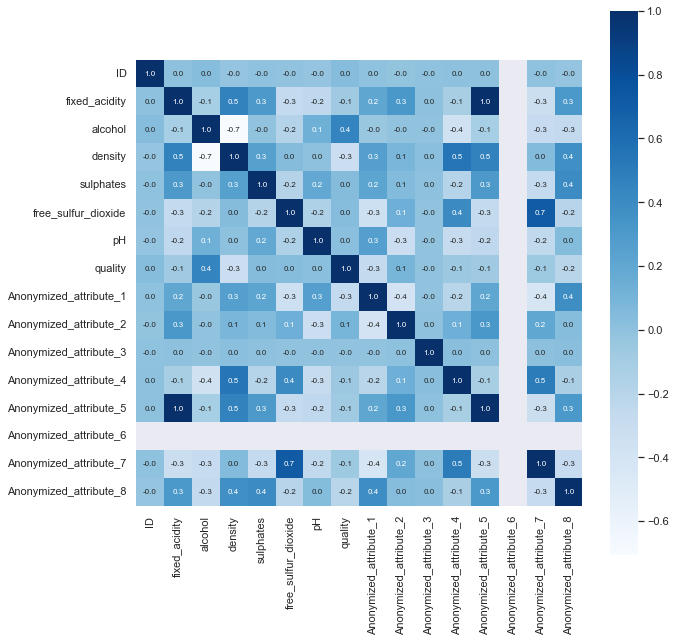

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [48]:
X = df.drop(['free_sulfur_dioxide', 'pH', 'density', 'Anonymized_attribute_3', 'Anonymized_attribute_5', 'Anonymized_attribute_6'],axis=1)
Y = df['quality']

In [49]:
print(X)
print(Y)

        ID  fixed_acidity  alcohol  sulphates  quality  \
0     3913            8.7      9.2       1.17        5   
1     2009            7.2      9.5       0.39        5   
2     3871            6.8     10.2       0.59        5   
3     6198            7.1      9.4       0.48        5   
4     1114            7.1     10.4       0.59        6   
...    ...            ...      ...        ...      ...   
4542  5180            6.5     10.7       0.42        5   
4543  1341            7.1     10.4       0.59        6   
4544  3865            6.4     10.4       0.65        6   
4545  5235            8.9      9.5       0.59        6   
4546  4311            6.4     10.6       0.38        5   

      Anonymized_attribute_1  Anonymized_attribute_2  Anonymized_attribute_4  \
0                      0.780                    0.51                    1.70   
1                      0.655                    0.03                    1.80   
2                      0.210                    0.62           

# Split the Data into Training and Testing Sets

The next steps involve splitting the data into training and testing sets. For accuracy purposes, the data has been split using an 80/20 partition, with 80% training data and 20% testing data.

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [54]:
print(X.shape, X_train.shape, X_test.shape)

(4493, 10) (3594, 10) (899, 10)


/Users/taylor/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


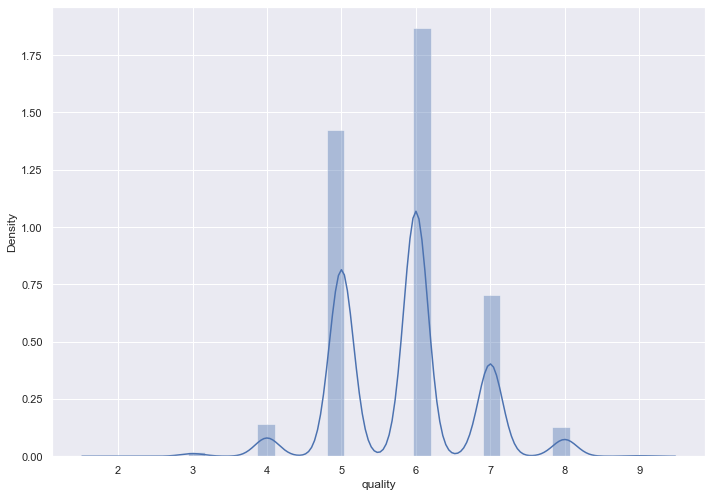

In [53]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['quality'], bins=30)
plt.show()

The above distribution shows that there are 3 primary identifiers that have the highest correlation. In total, there could be a potential of 5 having the highest correlation to contribution of the quality of wine. This means that in my linear regression models, I need to visualize the correlation between 3-5 features that contribute to the quality of wine. 

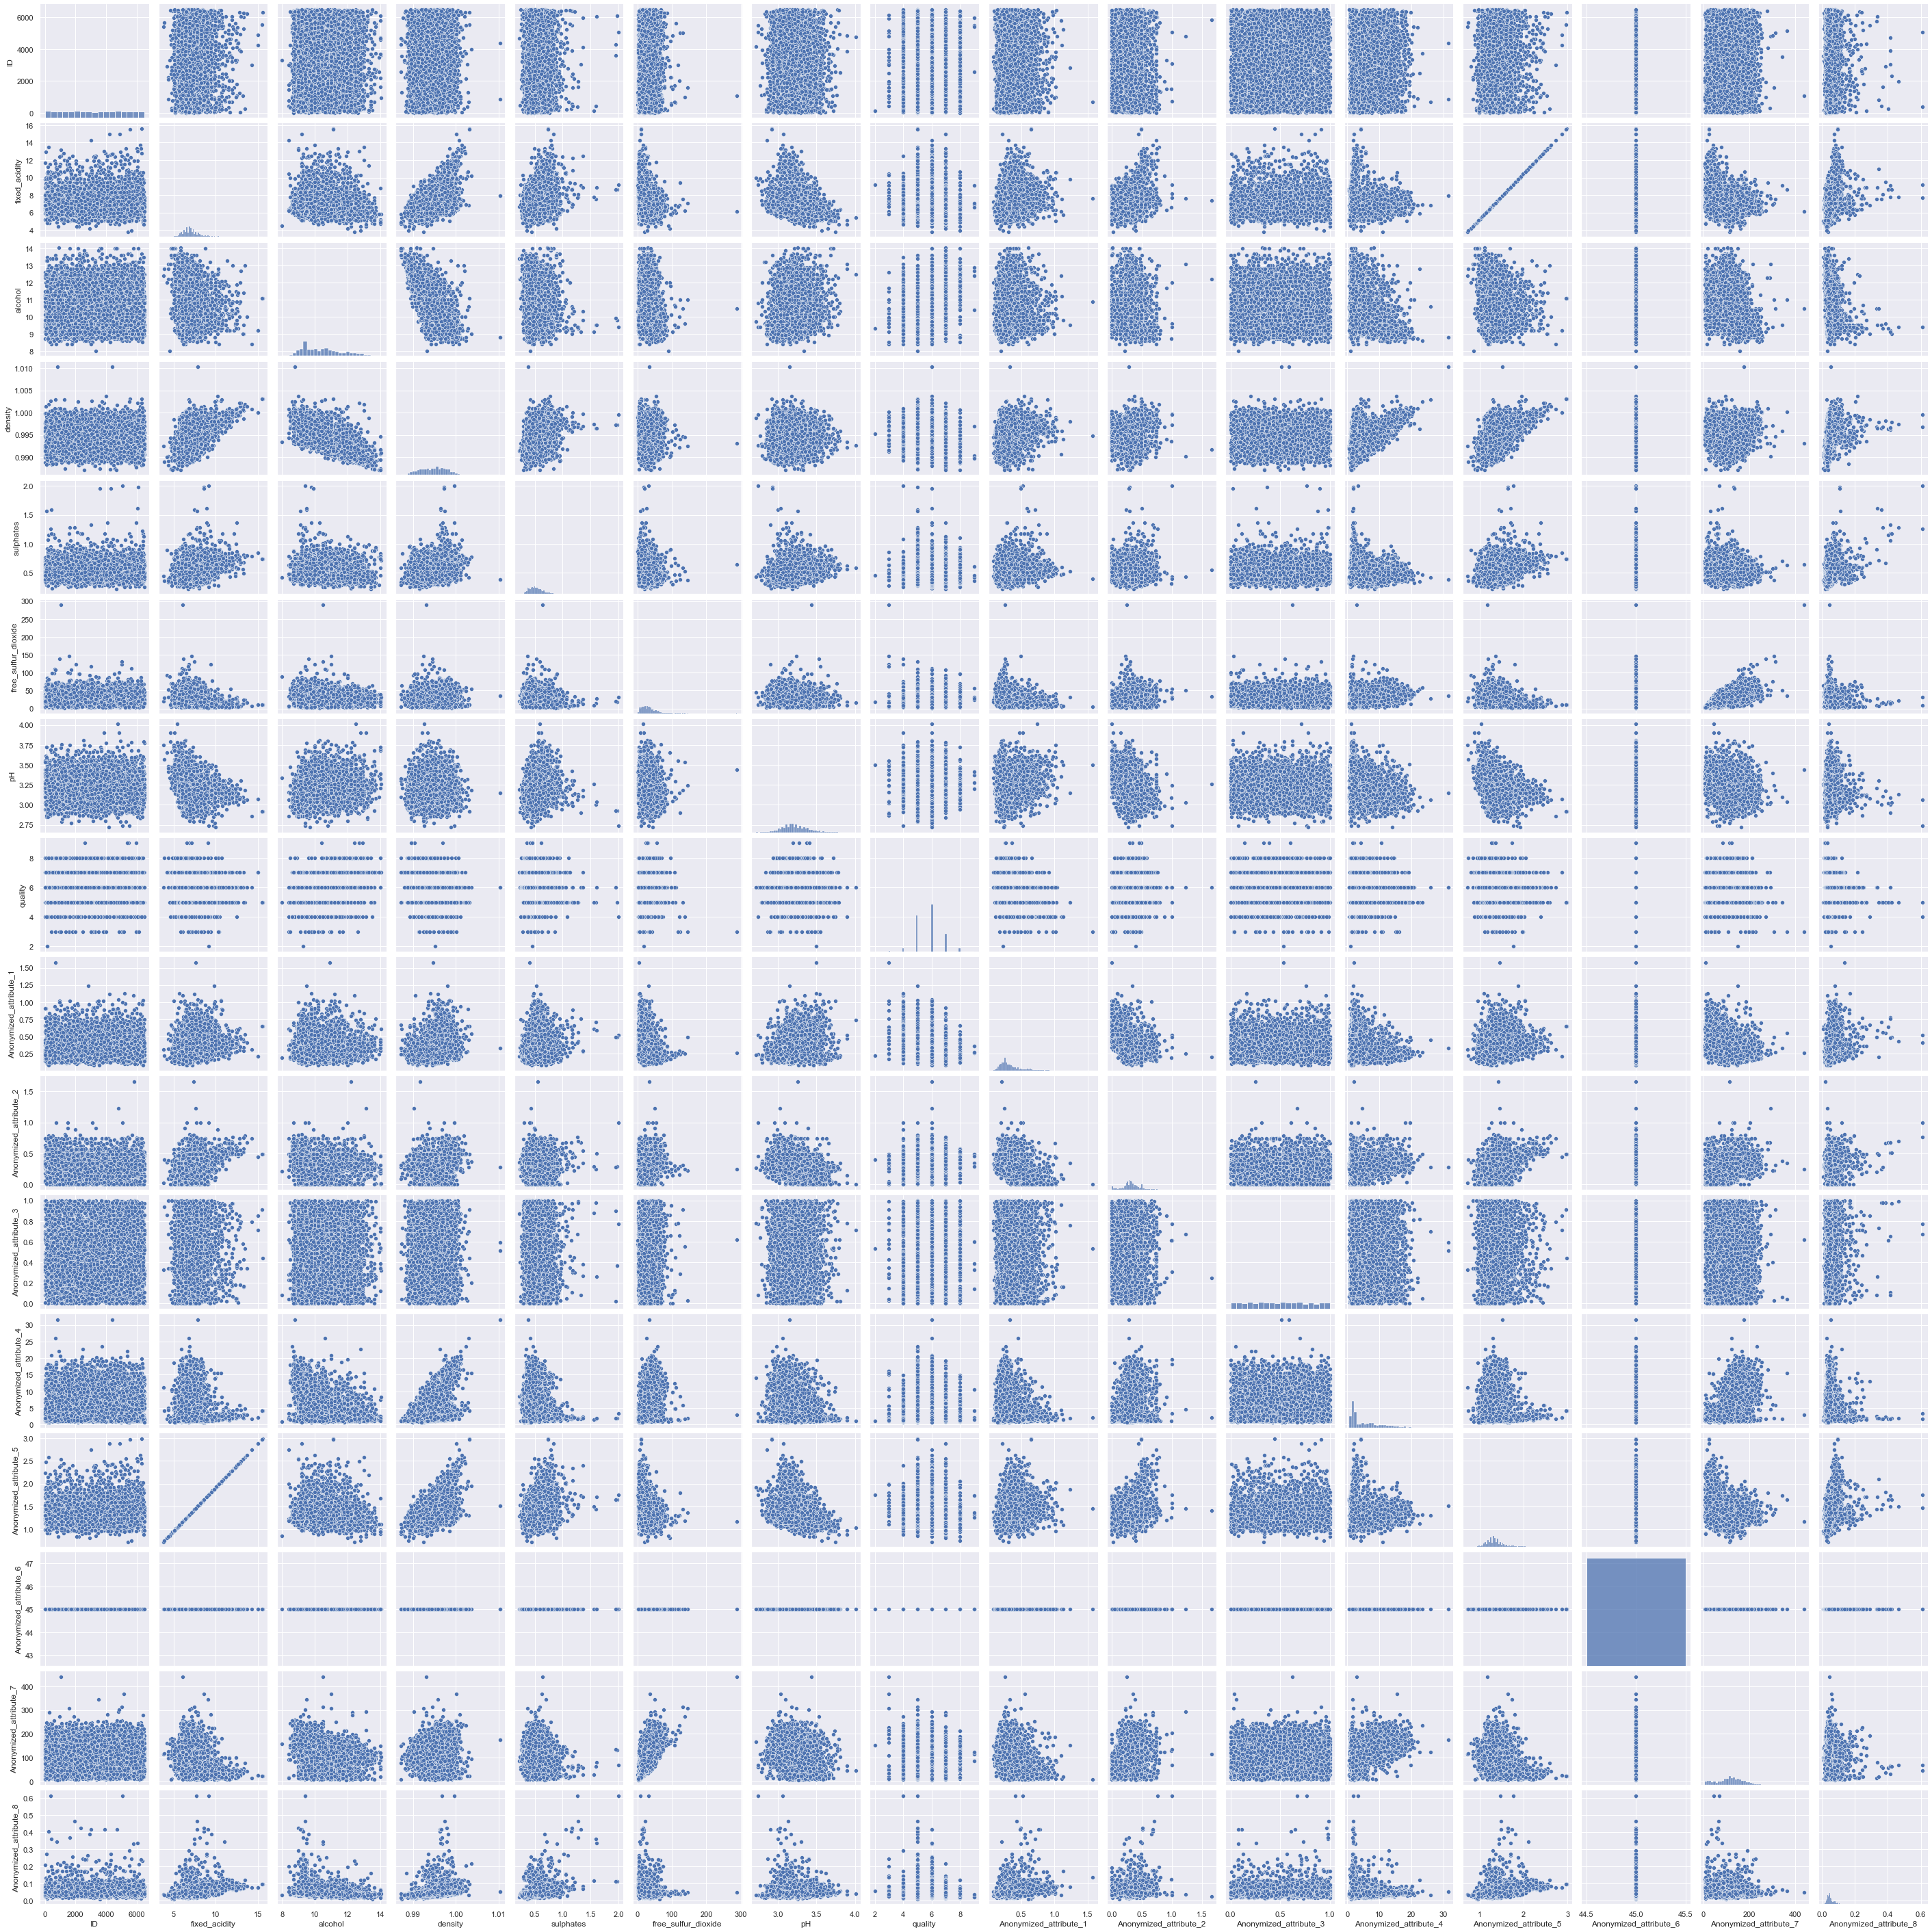

In [52]:
sns.pairplot(df)

The above data can determine the linear correlation between certain attributes of the wine, and anonymized attributes that can best be used to determine the fit of data. 

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [69]:
from sklearn.metrics import r2_score

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("Performance Model Training")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("Performance Model Testing")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Performance Model Training
--------------------------------------
RMSE is 1.85733010795406e-15
R2 score is 1.0


Performance Model Testing
--------------------------------------
RMSE is 1.7287283475485282e-15
R2 score is 1.0


In [60]:
print('Training set score: {:.4f}'.format(lin_model.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lin_model.score(X_test, Y_test)))

Training set score: 1.0000
Test set score: 1.0000


# Modeling Predictions

Since we are concerned with a variety of models that seek to determine the best prediction, this is easier done in a function that takes as input a variety of parameters and feeds them into the models that we wish to test on. The models that we are testing on include: 

* K-Nearest Neighbors
* Logistic Regression
* Random Forest
* XGboost

# Perform the 5-Fold Cross Validation Score

The 5-fold cross validation score allows us to train multiple models to gain a better understanding of the data and accuracy regarding measurement. This allows us to determine the best scenario from these models, and what the numbers and accuracy mean when training the data.

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def model_prediction(X,Y):
    # K-Nearest Neighbors
    knn = KNeighborsClassifier(n_neighbors = 7)
    knn.fit(X, Y)
    knn_scores = cross_val_score(knn,X,Y, cv=5, scoring='accuracy')

    # Logistic Regression
    log = LogisticRegression(random_state=0)
    log.fit(X,Y)
    log_scores = cross_val_score(log,X,Y, cv=5, scoring='accuracy')

    # Random Forest
    rand_forest = RandomForestClassifier(n_estimators=7)
    rand_forest.fit(X,Y)
    rand_forest_score = cross_val_score(rand_forest,X,Y, cv=5, scoring='accuracy')

    # XGBoost
    xg_boost = XGBClassifier(random_state=0)
    xg_boost.fit(X,Y)
    xg_boost_score = cross_val_score(xg_boost,X,Y, cv=5, scoring='accuracy')

    # Print out the accuracy scores
    print('K Nearest Neighbor Training Accuracy:', knn.score(X, Y))
    print('Logistic Regression Training Accuracy:', log.score(X, Y))
    print('Random Forest Classifier Training Accuracy:', rand_forest.score(X, Y))
    print('XGboost Training Accuracy:', xg_boost.score(X, Y))

    print("--------------------------------------")

    # Print out the cross validation scores to test the measurement of accuracy
    print('KNN Cross Validation Score', knn_scores)
    print('Logistic Regression Validation Score', log_scores)
    print('Random Forest Validation Score', rand_forest_score)
    print('XG Boost Cross Validation Score', xg_boost_score)


In [71]:
model = model_prediction(X,Y)

/Users/taylor/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/Users/taylor/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/taylor/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
 

[21:12:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/taylor/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/Users/taylor/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:12:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/taylor/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:12:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/taylor/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:12:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/taylor/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:12:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/taylor/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:12:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
K Nearest Neighbor Training Accuracy: 0.5299354551524594
Logistic Regression Training Accuracy: 0.4389049632762074
Random Forest Classifier Training Accuracy: 0.9995548631204095
XGboost Training Accuracy: 1.0
--------------------------------------
KNN Cross Validation Score [0.36596218 0.37263626 0.37708565 0.3752784  0.39643653]
Logistic Regression Validation Score [0.43826474 0.43604004 0.43604004 0.43652561 0.43541203]
Random Forest Validation Score [0.99443826 0.99110122 0.99332592 0.99554566 0.98997773]
XG Boost Cross Validation Score [1.         0.99888765 0.99888765 0.99888641 0.99888641]


# Predict the Outcome

Based on the outcomes and the accuracy and cross-validation, it is validated that the Random Forest would be the best model to predict on based on the numbers. This means that the best model to fit this data would be on the random forest. This is outlined in the code below. 

In [79]:
test_no_label = pd.read_csv('data/test_data_no_labels.csv')
test_no_label.dropna()
test_no_label = test_no_label.drop(['free_sulfur_dioxide', 'pH', 'density', 'Anonymized_attribute_3', 'Anonymized_attribute_5', 'Anonymized_attribute_6', 'type'], axis=1)
test_no_label.head()


ID  Anonymized_attribute_1  fixed_acidity  Anonymized_attribute_2  \
0   577                    0.48            7.6                    0.37   
1   377                    0.20            7.2                    0.61   
2  3419                    0.27            6.3                    0.51   
3  4816                    0.59            9.9                    0.07   
4  3551                    0.26            5.3                    0.23   

   alcohol  Anonymized_attribute_4  Anonymized_attribute_8  sulphates  \
0     11.4                    0.80                   0.037       0.39   
1      9.2                   16.20                   0.043       0.36   
2      9.4                    7.60                   0.049       0.54   
3      9.8                    3.40                   0.102       0.71   
4     10.5                    5.15                   0.034       0.51   

   Anonymized_attribute_7  
0                   100.0  
1                   103.0  
2                   200.0  
3                    71.0  
4                   160.0

In [82]:
predicted_data = RandomForestClassifier(n_estimators=7)
train_predict = predicted_data.fit(X_train, Y_train)
trained_predicted = train_predict.predict(test_no_label)
test_no_label['quality'] = trained_predicted
test_no_label

/Users/taylor/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- quality

  warnings.warn(message, FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# Output to a CSV

The data created should be output to a csv with matching labels.

In [85]:
submission = pd.DataFrame(test_no_label['ID'])
best_model = RandomForestClassifier(n_estimators = 7)
best_model.fit(X_train,Y_train)
submission['quality'] = best_model.predict(test_no_label)
submission.to_csv('2375-9905.csv', index=False)

/Users/taylor/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- quality

  warnings.warn(message, FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').